In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Open the video game sales file using pandas. Check characteristics of the dataset. What is the shape of the dataset, what are the statistics of the columns, are there any NaNs?

In [2]:
df = pd.read_csv('vgsales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.shape

(16598, 11)

Clean the dataset (if you find any NaNs)

In [5]:
df.isnull().values.any()
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df= df.dropna()
## alliws tha elega df.dropna(inplace=TRUE) gia na to swsei alliws sketo to df.dropna() apla to ektipwnei 

In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Which game has the highest global sales? What is its platform?

In [8]:
df.sort_values('Global_Sales', ascending=False)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16183,16186,Sakura-Sou no Pet na Kanojo,PSP,2013.0,Adventure,Kadokawa Games,0.00,0.00,0.01,0.00,0.01
16184,16187,Fatal Fury: Battle Archives Volume 2 (JP sales),PS2,2007.0,Fighting,SNK Playmore,0.00,0.00,0.01,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009.0,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


Which are the platforms in the dataset?


In [9]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Which are the top ten selling games for PS4 (Global sales)? Is this the same for Europe and Japan sales combined?

In [10]:
#df.groupby(['Platform'=='PS4','Global_Sales']).max()
#df2['EU+JP_Sales']= df2['EU_Sales'] + df2['JP_Sales']  vgazei kati den einai error apla proteinei na min to kanoume etsi 
df['EU+JP_Sales']= df['EU_Sales'] + df['JP_Sales'] 
df2= df[df['Platform']=='PS4']
df2.sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,6.16
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,6.17
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,6.12
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,3.51
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60,3.44
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96,3.39
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59,4.34
154,155,Destiny,PS4,2014.0,Shooter,Activision,2.49,2.05,0.16,0.96,5.65,2.21
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77,3.81
236,237,The Last of Us,PS4,2014.0,Action,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4.55,1.94


In [11]:
df2.sort_values('EU+JP_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,6.17
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,6.16
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,6.12
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59,4.34
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77,3.81
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,3.51
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60,3.44
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96,3.39
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20,2.25
295,296,Far Cry 4,PS4,2014.0,Shooter,Ubisoft,1.12,2.12,0.10,0.69,4.03,2.22


How many games were released for XOne in 2016? Which was the top selling in Europe?

In [12]:
df.groupby([df['Platform']=='XOne', df['Year']==2016]).count()

Rank   Name  Platform   Year  Genre  Publisher  NA_Sales  \
Platform Year                                                               
False    False  15790  15790     15790  15790  15790      15790     15790   
         True     288    288       288    288    288        288       288   
True     False    159    159       159    159    159        159       159   
         True      54     54        54     54     54         54        54   

                EU_Sales  JP_Sales  Other_Sales  Global_Sales  EU+JP_Sales  
Platform Year                                                               
False    False     15790     15790        15790         15790        15790  
         True        288       288          288           288          288  
True     False       159       159          159           159          159  
         True         54        54           54            54           54

In [13]:
df.groupby([df['Platform']=='XOne', df['Year']==2016]).max('EU_Sales')

Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Platform Year                                                              
False    False  16600  2020.0     41.49     29.02     10.22        10.57   
         True   16592  2016.0      1.30      3.75      1.27         0.69   
True     False  16508  2015.0      4.52      2.11      0.04         0.67   
         True   16579  2016.0      1.20      1.26      0.01         0.18   

                Global_Sales  EU+JP_Sales  
Platform Year                              
False    False         82.74        32.79  
         True           4.77         3.81  
True     False          7.30         2.11  
         True           2.01         1.26

In [14]:
df3=df[df['Platform']=='XOne'] #h alliws se mia grammi me & anti na ksanathetw 
df3=df3[df3['Year']==2016]
#df3.groupby([df['Year']==2016]).count()
df3.groupby('Year').count()
#len(df3)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
Year,,,,,,,,,,,
2016.0,54,54,54,54,54,54,54,54,54,54,54


In [15]:
df3.sort_values('EU_Sales', ascending=False).head(1)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
1224,1226,FIFA 17,XOne,2016.0,Sports,Electronic Arts,0.17,1.26,0.0,0.1,1.53,1.26


Replace where XOne with ‘X Box One’

In [16]:
df['Platform']= df['Platform'].replace('XOne', 'X Box One')

How many PC games have higher sales than 3 million global sales?

In [17]:
x= df[df['Global_Sales']>3.0].count()
x

Rank            464
Name            464
Platform        464
Year            464
Genre           464
Publisher       464
NA_Sales        464
EU_Sales        464
JP_Sales        464
Other_Sales     464
Global_Sales    464
EU+JP_Sales     464
dtype: int64

Which action game has the highest global sales?


In [18]:
df5= df[df['Genre']=='Action']
df5.sort_values('Global_Sales', ascending=False).head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.4,10.24


In which year the most games were released?

In [19]:
df.groupby('Year').count().sort_values('Name', ascending=False).head(1)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
Year,,,,,,,,,,,
2009.0,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431


Which platform had the most releases that year?

In [20]:
df6=df[df['Year']==2009]
df6.groupby('Platform').count().sort_values('Name', ascending=False).head(1)

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
Platform,,,,,,,,,,,
DS,405,405,405,405,405,405,405,405,405,405,405


Which are the top 5 selling platforms (games global sales) of all time? Plot your results in a graph

In [21]:
df.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).head(5)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,EU+JP_Sales
Platform,,,,,,,,
PS2,15917620,4263750.0,572.92,332.63,137.54,190.47,1233.46,470.17
X360,8192936,2480191.0,594.33,278.00,12.30,84.67,969.60,290.30
PS3,8823478,2622109.0,388.90,340.47,79.21,140.81,949.35,419.68
Wii,9929663,2591562.0,497.37,264.35,68.28,79.20,909.81,332.63
DS,20460770,4279469.0,388.53,194.05,175.02,60.29,818.91,369.07


<AxesSubplot:xlabel='Platform'>

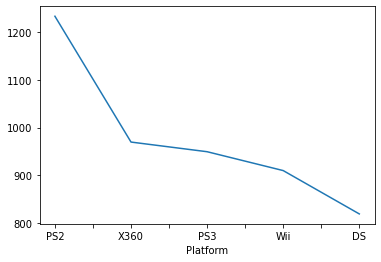

In [22]:
#x1=df.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).head(5)



df.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).head(5)['Global_Sales'].plot()

Which are the top three publishers in EU game sales? Use a pie plot to show their contribution. How is it compared with their global sales? Use plots to show your results.

In [23]:
df7=df.copy()
#df.groupby('Publisher').sort_values('Name', ascending=False).head(1)
df7.drop(['Rank','Year','NA_Sales','JP_Sales','Other_Sales','EU+JP_Sales','Name','Platform','Genre'], axis=1, inplace=True)


In [24]:
df7.groupby('Publisher').sum().sort_values('EU_Sales', ascending=False).head(3)

,EU_Sales,Global_Sales
Publisher,,
Nintendo,418.30,1784.43
Electronic Arts,367.38,1093.39
Activision,213.72,721.41


In [25]:
df7.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head(3)

,EU_Sales,Global_Sales
Publisher,,
Nintendo,418.30,1784.43
Electronic Arts,367.38,1093.39
Activision,213.72,721.41


<AxesSubplot:xlabel='Publisher'>

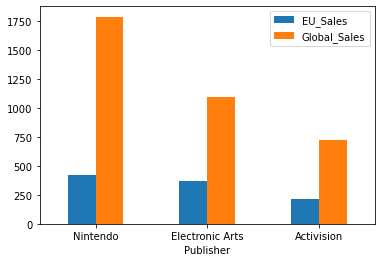

In [31]:
df7.groupby('Publisher').sum().sort_values('EU_Sales', ascending=False).head(3).plot.bar(rot=0)

<AxesSubplot:ylabel='EU_Sales'>

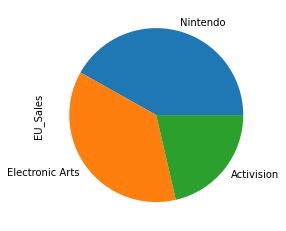

In [32]:
df7.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head(3)['EU_Sales'].plot.pie()

Which are the top 5 most mentioned genres of all time? Is this different in 2014, 2015, 2016?

In [37]:
df8=df.copy()
df8.drop(['Rank','Publisher','NA_Sales','JP_Sales','Other_Sales','EU+JP_Sales','Name','Platform','EU_Sales','Global_Sales'], axis=1, inplace=True)

In [55]:
#df8.groupby('Genre').count()
df8.groupby('Genre').count().sort_values('Year', ascending=False).head(5)


,Year
Genre,
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282


In [57]:
df9= df8[df8['Year']==2014]
df9.groupby('Genre').count().sort_values('Year', ascending=False).head(5)

,Year
Genre,
Action,186
Role-Playing,90
Adventure,75
Sports,55
Shooter,47


In [58]:
df10= df8[df8['Year']==2015]
df10.groupby('Genre').count().sort_values('Year', ascending=False).head(5)

,Year
Genre,
Action,255
Role-Playing,78
Sports,62
Adventure,54
Misc,39


In [59]:
df11= df8[df8['Year']==2016]
df11.groupby('Genre').count().sort_values('Year', ascending=False).head(5)

,Year
Genre,
Action,118
Role-Playing,40
Sports,38
Adventure,33
Shooter,32


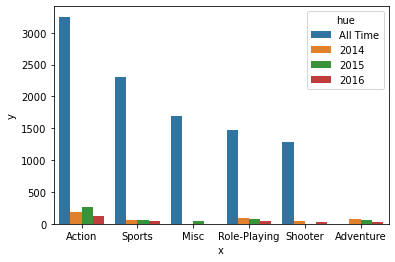

In [65]:
df12=pd.DataFrame({'x':['Action','Sports','Misc','Role-Playing','Shooter'],'y':[3251,2304,1686,1470,1282]})
df13=pd.DataFrame({'x':['Action','Role-Playing','Adventure','Sports','Shooter'],'y':[186,90,75,55,47]})
df14=pd.DataFrame({'x':['Action','Role-Playing','Sports','Adventure','Misc'],'y':[256,78,62,54,39]})
df15=pd.DataFrame({'x':['Action','Role-Playing','Sports','Adventure','Shooter'],'y':[118,40,38,33,32]})
df12['hue']= "All Time"
df13['hue']=2014
df14['hue']=2015
df15['hue']=2016
res=pd.concat([df12,df13,df14,df15])
sns.barplot(x='x',y='y',data=res,hue='hue')
plt.show()